#### **Name:** Britt Ahn

#### **Course:** CASMA665 <em>Mathematical Neuroscience</em>

#### **Date:** October 1, 2024

#### **Assignment:** Homework 2, <em>Hodgkin-Huxley Neuron</em>

<pre>
    
</pre>

___

<pre>
    
</pre>

### <span style="color:cornflowerblue"><ins>**Document Description**</ins></span>

Address Challenges 1-4 in the following module: <span style="color:darkgoldenrod"><ins>**mark-kramer.github.io/BU-MA665-MA666/HH.html**</ins></span>

<pre>
    
</pre>

___

<pre>
    
</pre>

### <span style="color:cornflowerblue"><ins>**Challenge 1**</ins></span>

**Questions:**

1. Describe the dynamics during an action potential in the HH model.

2. How does the voltage change?

3. How do the gates open and close?

4. How do the ions flow?


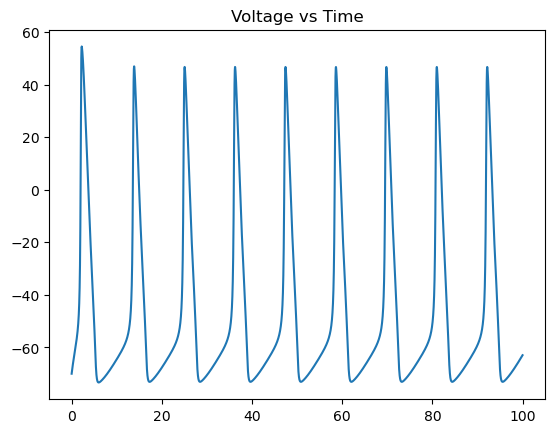

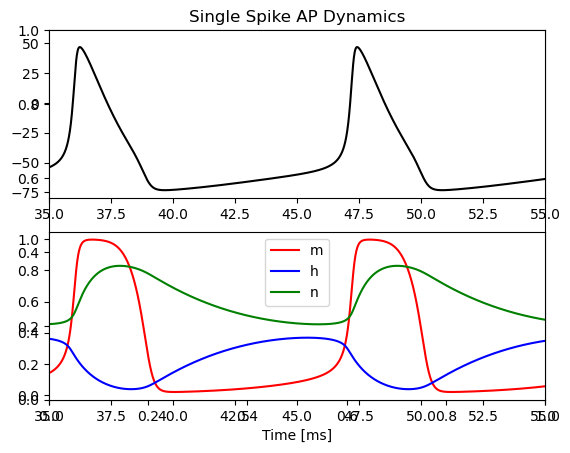

In [11]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

def alphaM(V):
    return (2.5-0.1*(V+65)) / (np.exp(2.5-0.1*(V+65)) -1)

def betaM(V):
    return 4*np.exp(-(V+65)/18)

def alphaH(V):
    return 0.07*np.exp(-(V+65)/20)

def betaH(V):
    return 1/(np.exp(3.0-0.1*(V+65))+1)

def alphaN(V):
    return (0.1-0.01*(V+65)) / (np.exp(1-0.1*(V+65)) -1)

def betaN(V):
    return 0.125*np.exp(-(V+65)/80)

def HH(I0,T0):
    dt = 0.01;
    T  = int(np.ceil(T0/dt))  # [ms]
    gNa0 = 120   # [mS/cm^2]
    ENa  = 125;  # [mV]
    gK0  = 15;   # [mS/cm^2]
    EK   = -12;  # [mV]
    gL0  = 0.3;  # [mS/cm^2]
    EL   = 10.6; # [mV]

    t = np.arange(0,T)*dt
    V = np.zeros([T,1])
    m = np.zeros([T,1])
    h = np.zeros([T,1])
    n = np.zeros([T,1])

    V[0]=-70.0
    m[0]=0.05
    h[0]=0.54
    n[0]=0.34

    for i in range(0,T-1):
        V[i+1] = V[i] + dt*(gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + I0);
        m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i]);
        h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i]);
        n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i]);
    return V,m,h,n,t

I0 = 10
T0 = 100
[V,m,h,n,t]=HH(I0,T0)

plt.figure()
plt.title("Voltage vs Time")
plt.plot(t,V)
plt.show()

plt.figure()
plt.title("Single Spike AP Dynamics")
ax1 = plt.subplot(211);                 # Define axis for 1st subplot,
ax2 = plt.subplot(212, sharex=ax1);     # ... and link axis of 2nd subplot to the 1st.
ax1.plot(t,V,'k')                   # Plot the voltage in the first subplot,
plt.xlim([35, 55])
ax2.plot(t,m,'r', label='m')        # ... and the gating variables in the other subplot.
ax2.plot(t,h,'b', label='h')
ax2.plot(t,n,'g', label='n')
plt.xlabel('Time [ms]')
plt.legend()
plt.show()


<pre>
    
</pre>

___

<pre>
    
</pre>

### <span style="color:cornflowerblue"><ins>**Challenge 2**</ins></span>

**Questions:**

1. Determine how the firing rate of the HH model varies with input current I.

2. Plot the firing rate versus I (i.e., plot the “f-I curve”).

In [ ]:
# Compute the firing rate.
# Recursively call the HH(I0, T0) function.

<pre>
    
</pre>

___

<pre>
    
</pre>

### <span style="color:cornflowerblue"><ins>**Challenge 3**</ins></span>

**Questions:**

1. How does the firing rate of the HH model change as you increase the potassium conductance?

3. Provide a “simulation” explanation and a “physical” explanation.

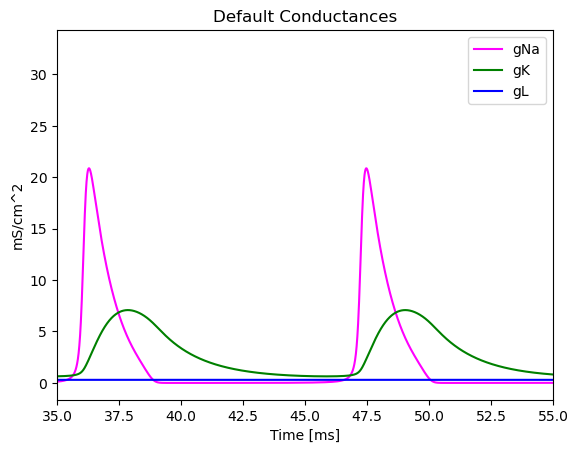

In [15]:
# Plot the conductances

gNa0 = 120
gNa  = gNa0*(m**3)*h                    #Sodium conductance
gK0  = 15
gK   = gK0*(n**4)                    #Potassium conductance
gL0  = 0.3
gL   = gL0*(n/n)  # Leak conductance (constant); multiply by 1 (n/n) to create array of equal shape as gK, gNa

plt.figure()
plt.title("Default Conductances")
plt.plot(t,gNa,'magenta', label='gNa')#... and plot the sodium conductance,
plt.plot(t,gK, 'green', label='gK') #... and plot the potassium conductance,
plt.plot(t,gL, 'blue', label='gL') #... and plot the leak conductance.
plt.xlim([35, 55])
plt.xlabel('Time [ms]')             #... label the x-axis.
plt.ylabel('mS/cm^2')               #... and label the y-axis.
plt.legend()                        #... make a legend.
plt.show()


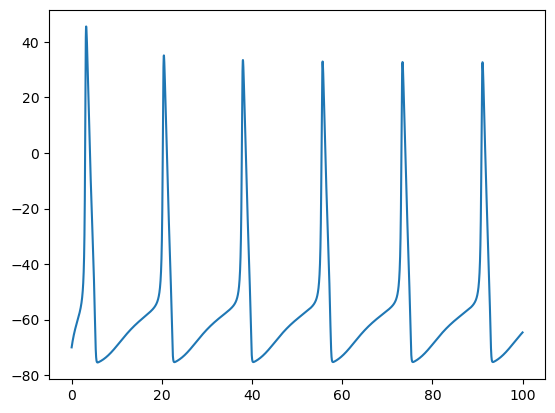

In [29]:
# Now, increase the potassium conductance from 15 to 35 [mS/cm^2].

def HH(I0,T0):
    dt = 0.01;
    T  = int(np.ceil(T0/dt))  # [ms]
    gNa0 = 120   # [mS/cm^2]
    ENa  = 125;  # [mV]
    gK0  = 44;   # [mS/cm^2]          # Triple the potassium conductance
    EK   = -12;  # [mV]
    gL0  = 0.3;  # [mS/cm^2]
    EL   = 10.6; # [mV]

    t = np.arange(0,T)*dt
    V = np.zeros([T,1])
    m = np.zeros([T,1])
    h = np.zeros([T,1])
    n = np.zeros([T,1])

    V[0]=-70.0
    m[0]=0.05
    h[0]=0.54
    n[0]=0.34

    for i in range(0,T-1):
        V[i+1] = V[i] + dt*(gNa0*m[i]**3*h[i]*(ENa-(V[i]+65)) + gK0*n[i]**4*(EK-(V[i]+65)) + gL0*(EL-(V[i]+65)) + I0);
        m[i+1] = m[i] + dt*(alphaM(V[i])*(1-m[i]) - betaM(V[i])*m[i]);
        h[i+1] = h[i] + dt*(alphaH(V[i])*(1-h[i]) - betaH(V[i])*h[i]);
        n[i+1] = n[i] + dt*(alphaN(V[i])*(1-n[i]) - betaN(V[i])*n[i]);
    return V,m,h,n,t

# Call HH function again
I0 = 10
T0 = 100
[V,m,h,n,t]=HH(I0,T0)

# Plot voltages
plt.figure()
plt.plot(t,V)
plt.show()


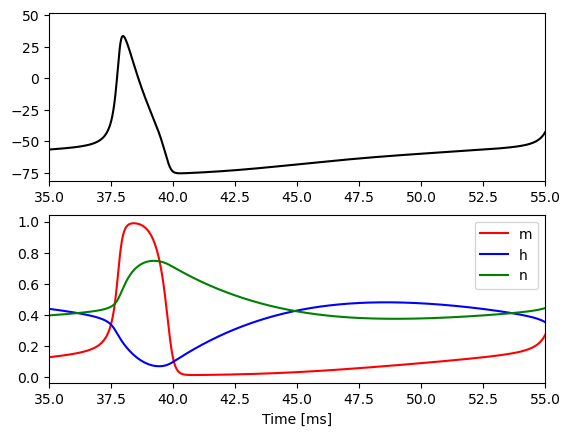

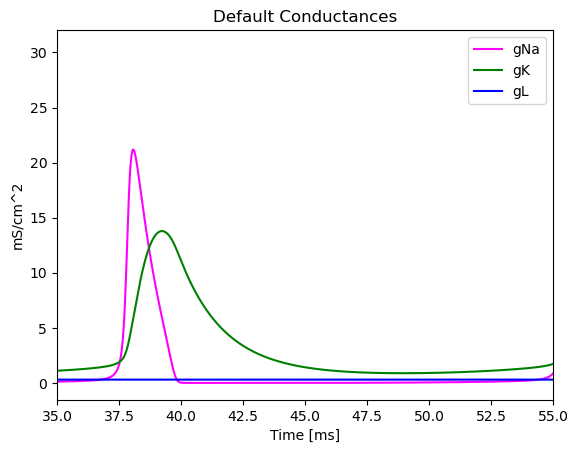

In [31]:

plt.figure()
ax1 = plt.subplot(211);                 # Define axis for 1st subplot,
ax2 = plt.subplot(212, sharex=ax1);     # ... and link axis of 2nd subplot to the 1st.
ax1.plot(t,V,'k')                   # Plot the voltage in the first subplot,
plt.xlim([35, 55])
ax2.plot(t,m,'r', label='m')        # ... and the gating variables in the other subplot.
ax2.plot(t,h,'b', label='h')
ax2.plot(t,n,'g', label='n')
plt.xlabel('Time [ms]')
plt.legend()
plt.show()

# Plot the conductances
gNa0 = 120
gNa  = gNa0*(m**3)*h                    #Sodium conductance
gK0  = 44
gK   = gK0*(n**4)                    #Potassium conductance
gL0  = 0.3
gL   = gL0*(n/n)  # Leak conductance (constant); multiply by 1 (n/n) to create array of equal shape as gK, gNa

plt.figure()
plt.title("Default Conductances")
plt.plot(t,gNa,'magenta', label='gNa')#... and plot the sodium conductance,
plt.plot(t,gK, 'green', label='gK') #... and plot the potassium conductance,
plt.plot(t,gL, 'blue', label='gL') #... and plot the leak conductance.
plt.xlim([35, 55])
plt.xlabel('Time [ms]')             #... label the x-axis.
plt.ylabel('mS/cm^2')               #... and label the y-axis.
plt.legend()                        #... make a legend.
plt.show()


In [ ]:
# FI Plot for low potassium conductance

In [ ]:
# FI plot for high potassium conductance

<pre>
    
</pre>

___

<pre>
    
</pre>

### <span style="color:cornflowerblue"><ins>**Challenge 4**</ins></span>

**Questions:**

1. How does the firing rate of the HH model change as you increase sodium conductance?

2. Provide a “simulation” explanation and a “physical” explanation.

In [ ]:
# Increase the sodium conductance.